# Summary

This notebook illustrates the traditional Bollinger Bands method (https://en.wikipedia.org/wiki/Bollinger_Bands) on a generated dataset.

It compares the anomalies identified with a classical ML algorithm for anomaly detection (Isolation Forest) with the results obtained with Bollinger bands on a univariate time series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [2]:

# Generate synthetic time series data
np.random.seed(42)
n = 200
time = pd.date_range('2021-01-01', periods=n, freq='D')
data = np.random.normal(0, 1, size=n)

# Introduce anomalies
data[50:55] = data[50:55] + np.random.normal(10, 1, size=5)
data[150:155] = data[150:155] - np.random.normal(10, 1, size=5)

# Create a DataFrame
df = pd.DataFrame({'time': time, 'value': data})
df.set_index('time', inplace=True)

# Calculate Bollinger Bands
window = 20
df['rolling_mean'] = df['value'].rolling(window=window).mean()
df['rolling_std'] = df['value'].rolling(window=window).std()
df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * 2)
df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * 2)

# Detect anomalies using Isolation Forest
clf = IsolationForest(contamination=0.05)
df['anomaly'] = clf.fit_predict(df[['value']])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


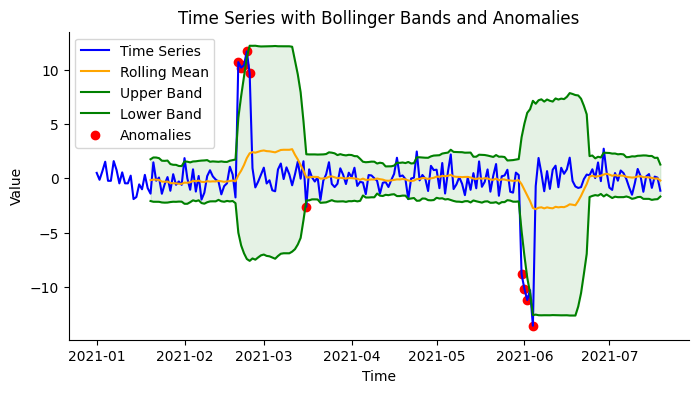

In [3]:
# Plot the time series with Bollinger Bands and anomalies
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['value'], label='Time Series', color='blue')
plt.plot(df.index, df['rolling_mean'], label='Rolling Mean', color='orange')
plt.plot(df.index, df['upper_band'], label='Upper Band', color='green')
plt.plot(df.index, df['lower_band'], label='Lower Band', color='green')
plt.fill_between(df.index, df['upper_band'], df['lower_band'], color='green', alpha=0.1)

# Highlight anomalies
anomalies = df[df['anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomalies')

plt.title('Time Series with Bollinger Bands and Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
sns.despine()
plt.legend()
plt.show()